# Differentially-Private Kmeans clustering<br>KFUPM<br>College of Computer Science and Engineering<br>Computer Engineering Department<br>COE 449: Privacy Enhancing Technologies

Fall 2019 (191)



Student: **Faris Hijazi s201578750**

In [20]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import utils
import dp_kmeans

%matplotlib inline

In [21]:
epsilon = 0.1 # privacy budget E
k = 5

## Importing the data

In [22]:
data_raw = pd.read_csv('./data/ipums.csv')

print('shape:', data_raw.shape)
print('count NaNs:\n', data_raw.isna().sum())
data_raw.head()

shape: (20000, 8)
count NaNs:
 Age            0
Gender         0
Marital        0
Race status    0
Birth place    0
Language       0
Occupation     0
Income (K)     0
dtype: int64


Age  Gender  Marital  Race status  Birth place  Language  Occupation  \
0   33       1        6            2            1         1          10   
1   40       2        4            1            1         1           6   
2   21       2        6            1            1         1           3   
3   39       1        4            1            1         1           6   
4   55       2        4            1            1         1          10   

   Income (K)  
0         144  
1         830  
2         992  
3         673  
4         470

In [23]:
data_raw.describe()

Age        Gender       Marital   Race status   Birth place  \
count  20000.000000  20000.000000  20000.000000  20000.000000  20000.000000   
mean      41.154150      1.492000      2.663050      1.614050     41.978350   
std       14.277047      0.499948      2.124227      1.603066    102.422734   
min       16.000000      1.000000      1.000000      1.000000      1.000000   
25%       30.000000      1.000000      1.000000      1.000000      1.000000   
50%       41.000000      1.000000      1.000000      1.000000      6.000000   
75%       51.000000      2.000000      5.000000      1.000000     36.000000   
max       94.000000      2.000000      6.000000      9.000000    950.000000   

           Language    Occupation    Income (K)  
count  20000.000000  20000.000000  20000.000000  
mean       3.358600      7.340350    458.472450  
std        9.861373      2.227097    259.144186  
min        1.000000      0.000000      1.000000  
25%        1.000000      6.000000    254.000000  
50%        1.000000      7.000000    472.000000  
75%        1.000000      8.000000    610.000000  
max       96.000000     11.000000    992.000000

In [24]:
# trimming the data
data_raw = data_raw.loc[:2000,:]
data_raw.shape

(2001, 8)

In [38]:
# normalizing the values
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler as StdSc

pca = PCA().fit(data_raw)

# data = pd.DataFrame(StandardScaler().fit_transform(data_raw), columns=data_raw.columns)
data = pd.DataFrame(StdSc().fit_transform(pca.transform(data_raw)), columns=data_raw.columns)


In [39]:
data.head()

Age    Gender   Marital  Race status  Birth place  Language  \
0 -1.301742 -0.343343 -0.717460    -0.015729     0.277231  1.855550   
1  1.347888 -0.190368 -0.050845     0.020103     0.322336  0.569122   
2  1.973914 -0.155304 -1.355969    -0.013604     1.483425  0.117719   
3  0.741491 -0.225390 -0.159329     0.007534     0.513705  0.360386   
4 -0.042869 -0.269702  0.917052     0.043954    -0.388916  1.884025   

   Occupation  Income (K)  
0    0.643561   -1.320834  
1   -0.415865    1.170075  
2   -0.571240    1.151090  
3   -0.415024   -0.955258  
4   -0.313299    1.016793

In [40]:
data.describe()

Age        Gender       Marital   Race status   Birth place  \
count  2.001000e+03  2.001000e+03  2.001000e+03  2.001000e+03  2.001000e+03   
mean   2.729784e-17 -7.296068e-18  3.448294e-17 -2.076467e-17 -3.412230e-17   
std    1.000250e+00  1.000250e+00  1.000250e+00  1.000250e+00  1.000250e+00   
min   -1.885114e+00 -3.750642e-01 -1.871365e+00 -6.070064e+00 -2.544869e+00   
25%   -6.491585e-01 -2.814998e-01 -8.271756e-01 -9.237801e-02 -7.254969e-01   
50%   -3.469361e-02 -2.364295e-01  4.289488e-02 -1.810219e-02 -5.205488e-02   
75%    5.939825e-01 -1.096292e-01  7.537648e-01  1.952133e-02  7.067538e-01   
max    1.973982e+00  9.485418e+00  2.947852e+00  2.025469e+01  3.511840e+00   

           Language    Occupation    Income (K)  
count  2.001000e+03  2.001000e+03  2.001000e+03  
mean  -8.017353e-17 -2.835202e-17  6.563687e-17  
std    1.000250e+00  1.000250e+00  1.000250e+00  
min   -3.303130e+00 -3.525329e+00 -1.443752e+00  
25%   -7.258353e-01 -3.600635e-01 -9.741721e-01  
50%   -8.741306e-02 -2.722036e-01  6.162016e-01  
75%    6.663929e-01 -1.727635e-01  9.790007e-01  
max    3.351501e+00  7.229977e+00  1.460793e+00

Choosing a subset of features `['Age', 'Gender', 'Marital', 'Race status', 'Birth place', 'Language', 'Occupation', 'Income (K)']`

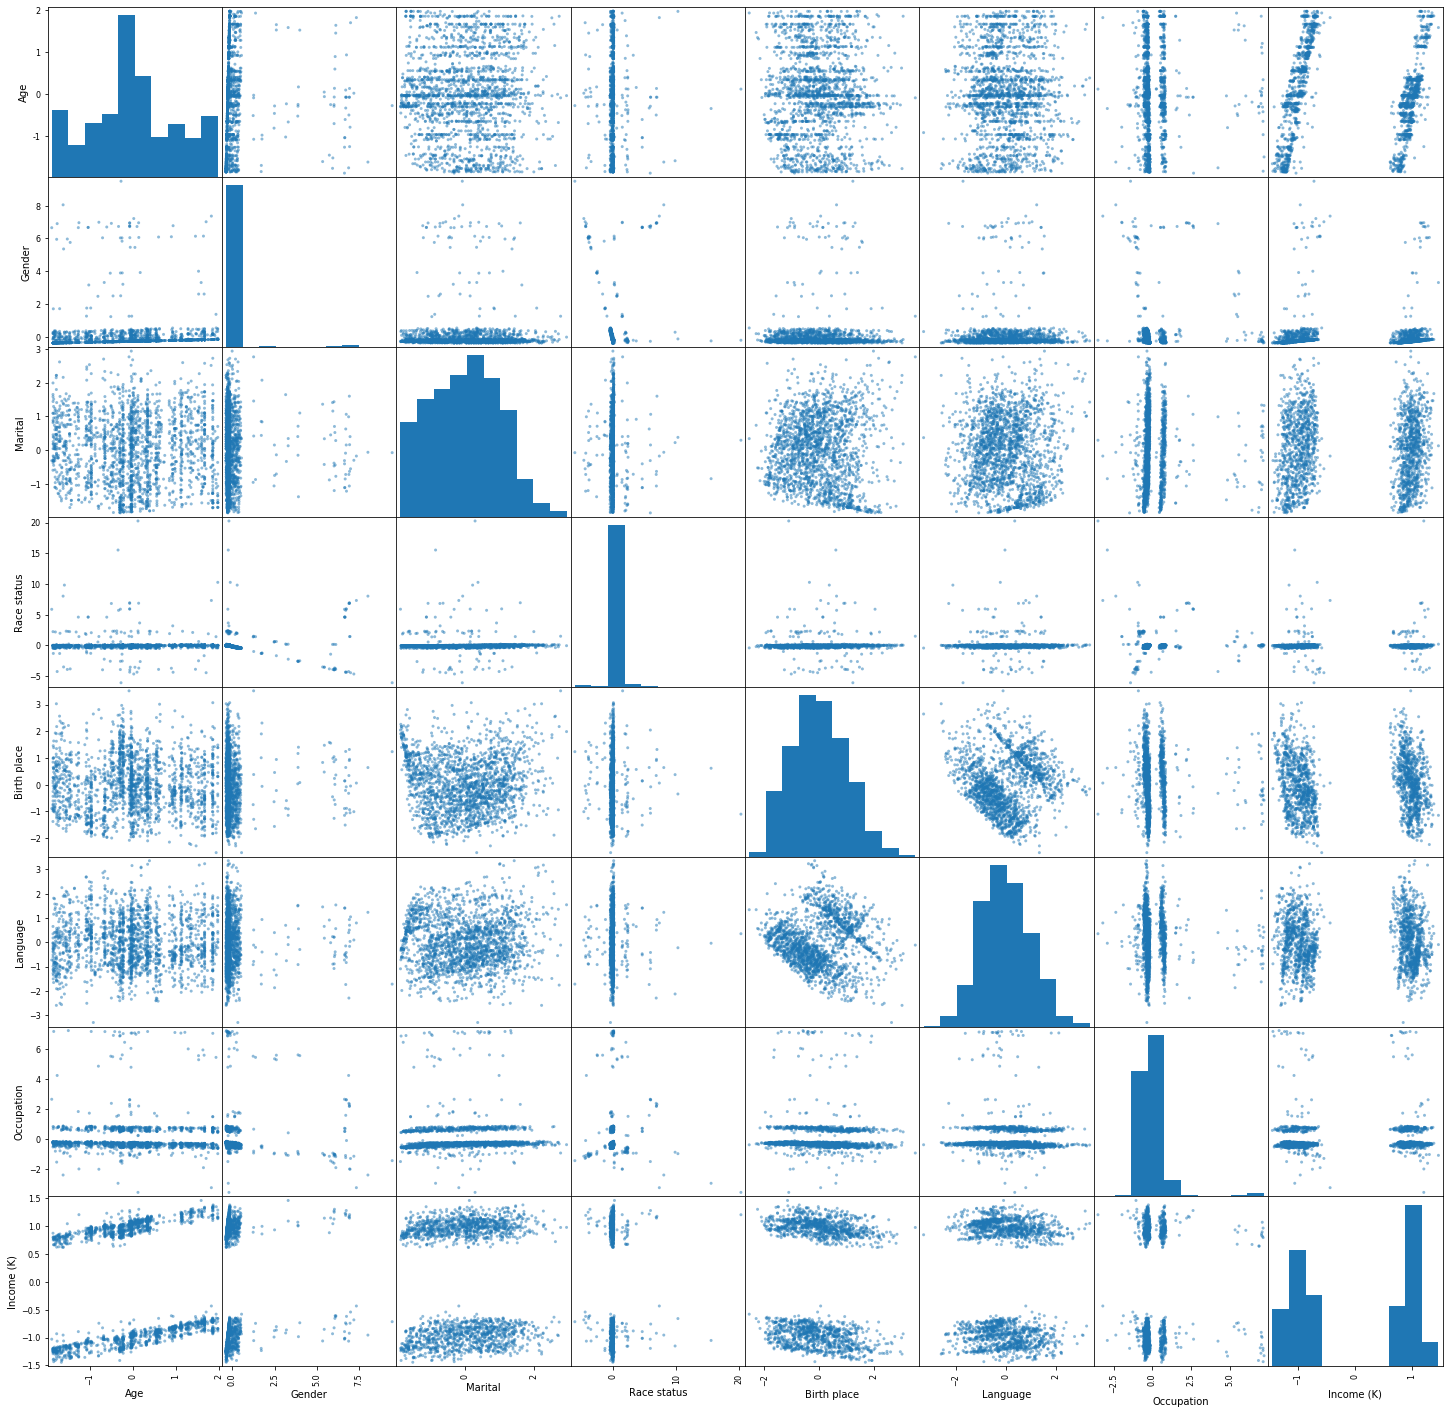

In [41]:
pd.plotting.scatter_matrix(data, figsize=(25, 25));

Raw Data | PCA
-|-
![scatter_matrix](notebook_images/scatter_matrix.png) |![scatter_matrix](notebook_images/scatter_matrix_pca.png)

In [42]:
df = data.loc[:, ['Birth place', 'Language', 'Income (K)']]

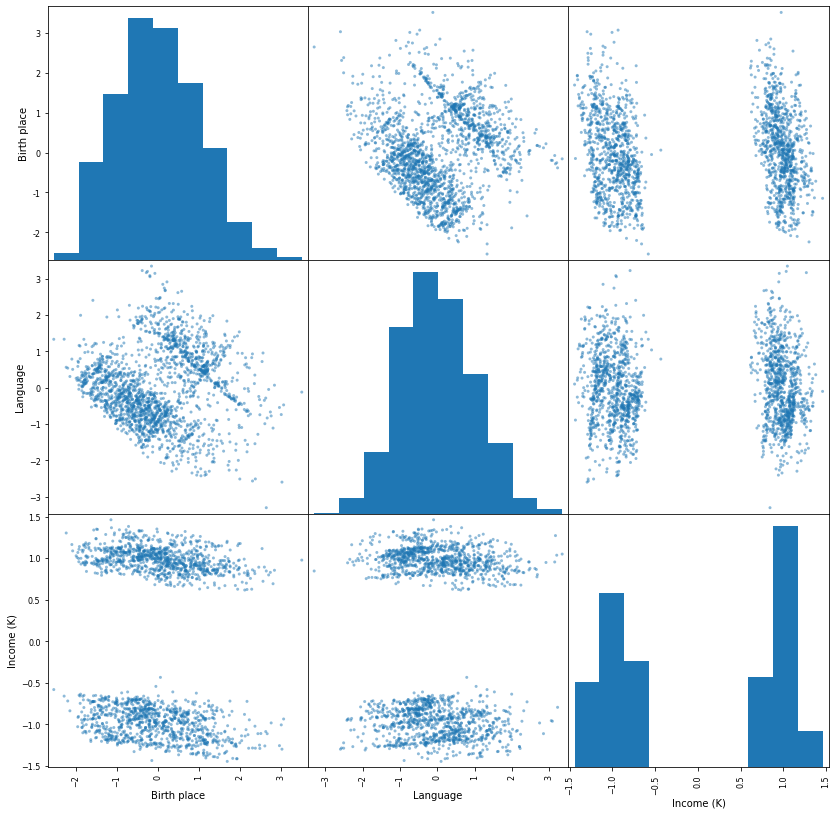

In [43]:
pd.plotting.scatter_matrix(df, figsize=(14, 14));

## Test on normal (vanilla) kmeans

In [44]:
# normal kmeans clustering
from sklearn.cluster import KMeans
from ipywidgets import interact, interactive, fixed, interact_manual, IntSlider


def regular_kmeans(k=k):
    clf = KMeans(n_clusters=k, random_state=0).fit(df.values)
    centroids, labels = clf.cluster_centers_, clf.labels_
    
    print('regular kmeans')
    utils.kmeans_matrix(df.values, k, centroids, labels, chunk_size=3, columns=df.columns)
    
    return centroids, labels

interact_manual(regular_kmeans, k=IntSlider(min=2, max=20, step=1, value=k))

interactive(children=(IntSlider(value=5, description='k', max=20, min=2), Button(description='Run Interact', s…

<function __main__.regular_kmeans(k=5)>

## Implementing Differentially Private Kmeans

This is done following the bellow diagram:

([See article](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0206832))

[image source](https://doi.org/10.1371/journal.pone.0206832.g003)

![asmd](./notebook_images/asmd.png)

- [A Convergent Differentially Private k-Means Clustering Algorithm](https://link.springer.com/chapter/10.1007/978-3-030-16148-4_47)
- 

### Algorithm

1. Divide equally to `k` clusters
2. For each cluster:
   - find `sum` of points, and the `num` (number of records)
   - find `centroids` $centroid = \frac{sum}{num}$
3. For each cluster: find $S_k$
     Add laplase noise to `sum` and `num`: $noise = Lap(\frac{\delta{f}}{ \sum_kt })$
4. Find the new cluster centroids
5. Check condition

Basic definition.
contour coefficients is a way of evaluating clustering results. The combination of cohesion and resolution can be used to evaluate the effects of different algorithms or clustering results of different operation modes based on the same original data. As for the same sample point i, the contour coefficient calculation formula is as follows:

(4) ![](https://journals.plos.org/plosone/article/file?type=thumbnail&id=info:doi/10.1371/journal.pone.0206832.e005)

In the formula:
- `ai` represents the average similarity between sample i and other samples in the same cluster.  
  The smaller `ai` is, more sample i should be clustered.

- `bi` represents the minimum value of the average distance from i to all samples from other clusters.  
  That is to say, `bi = min{bi1,bi2,…,bik}`. The contour coefficient is in [–1,1].

The larger S(i) is, the closer the cluster where the point i locates is. So the average contour coefficient for each cluster is calculated as follows:

(5) ![](https://journals.plos.org/plosone/article/file?type=thumbnail&id=info:doi/10.1371/journal.pone.0206832.e006)

In the formula, numk stands for the number of samples in cluster No. k. The larger the S(k) value, the better the clustering effect and vice versa.

## Running the algorithm

df.shape (2001, 3)
DP Kmeans eps= 100
S_k(0) S_k(1) S_k(2) 2 error=3.2420857868071202
S_k(0) S_k(1) S_k(2) 3 error=0.5339839043627843
S_k(0) S_k(1) S_k(2) 4 error=0.3197717179484748
S_k(0) S_k(1) S_k(2) 5 error=0.20884090952296452
S_k(0) S_k(1) S_k(2) 6 error=0.23302324788744905
S_k(0) S_k(1) S_k(2) 7 error=0.16137221112583144
S_k(0) S_k(1) S_k(2) 8 error=0.13028585315939492
S_k(0) S_k(1) S_k(2) 9 error=0.07791478731575427
S_k(0) S_k(1) S_k(2) 10 error=0.060016958125203766
S_k(0) S_k(1) S_k(2) 11 error=0.06578747845621857
S_k(0) S_k(1) S_k(2) 12 error=0.07425839108337502
S_k(0) S_k(1) S_k(2) 13 error=0.29618290189144614
S_k(0) S_k(1) S_k(2) 14 error=1.0821693219047348
S_k(0) S_k(1) S_k(2) 15 error=3.7196857818628746
S_k(0) S_k(1) S_k(2) 16 error=5.967935547738461
S_k(0) S_k(1) S_k(2) 17 error=3.2929999768938285
S_k(0) S_k(1) S_k(2) 18 error=87.5686164754747
S_k(0) S_k(1) 
S_k(1)=NaN ENCOUNTERED, restarting...
S_k(0) S_k(1) S_k(2) 2 error=3.124966778072465
S_k(0) S_k(1) S_k(2) 3 error=0

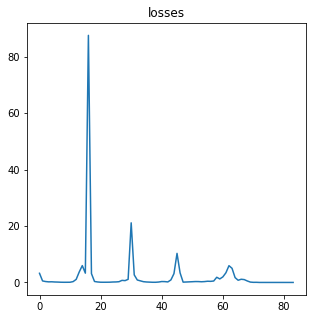

plotting kmeans clusters matrix...
plotting kmeans_matrix...


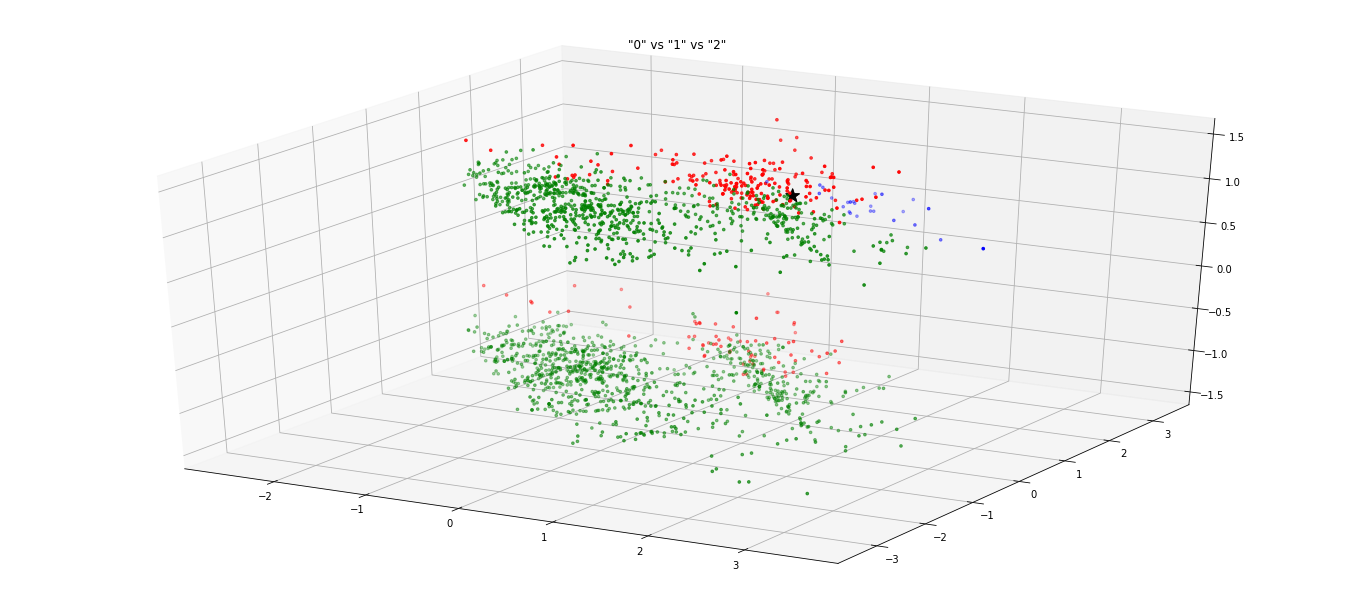

In [48]:
from importlib import reload
reload(utils); reload(dp_kmeans);

print('df.shape', df.shape)
# dp kmeans
n_clusters = 3
eps = 100

print('DP Kmeans eps=', eps)
centroids_dp, labels_dp = dp_kmeans.kmeans(df, eps=eps, n_clusters=n_clusters, plot=True, seed=None, verbose=True)

In [34]:
centroids_dp

array([[1.0000004 , 1.00000033, 0.99999973],
       [1.00000435, 1.00000422, 1.00000307]])

In [ ]:
n_clusters = 4

# regular kmeans
clf = KMeans(n_clusters=n_clusters, random_state=0).fit(df.values)
centroids_reg, labels_reg = clf.cluster_centers_, clf.labels_

In [ ]:
print('Regular Kmeans')
utils.kmeans_matrix(df, n_clusters, centroids_reg, labels_reg, chunk_size=3);

##### Comparing results

In [ ]:

utils.kmeans_matrix_compare(df, n_clusters, centroids_reg, labels_reg, centroids_dp, labels_dp, chunk_size=3);

plotting comparison kmeans_matrix...


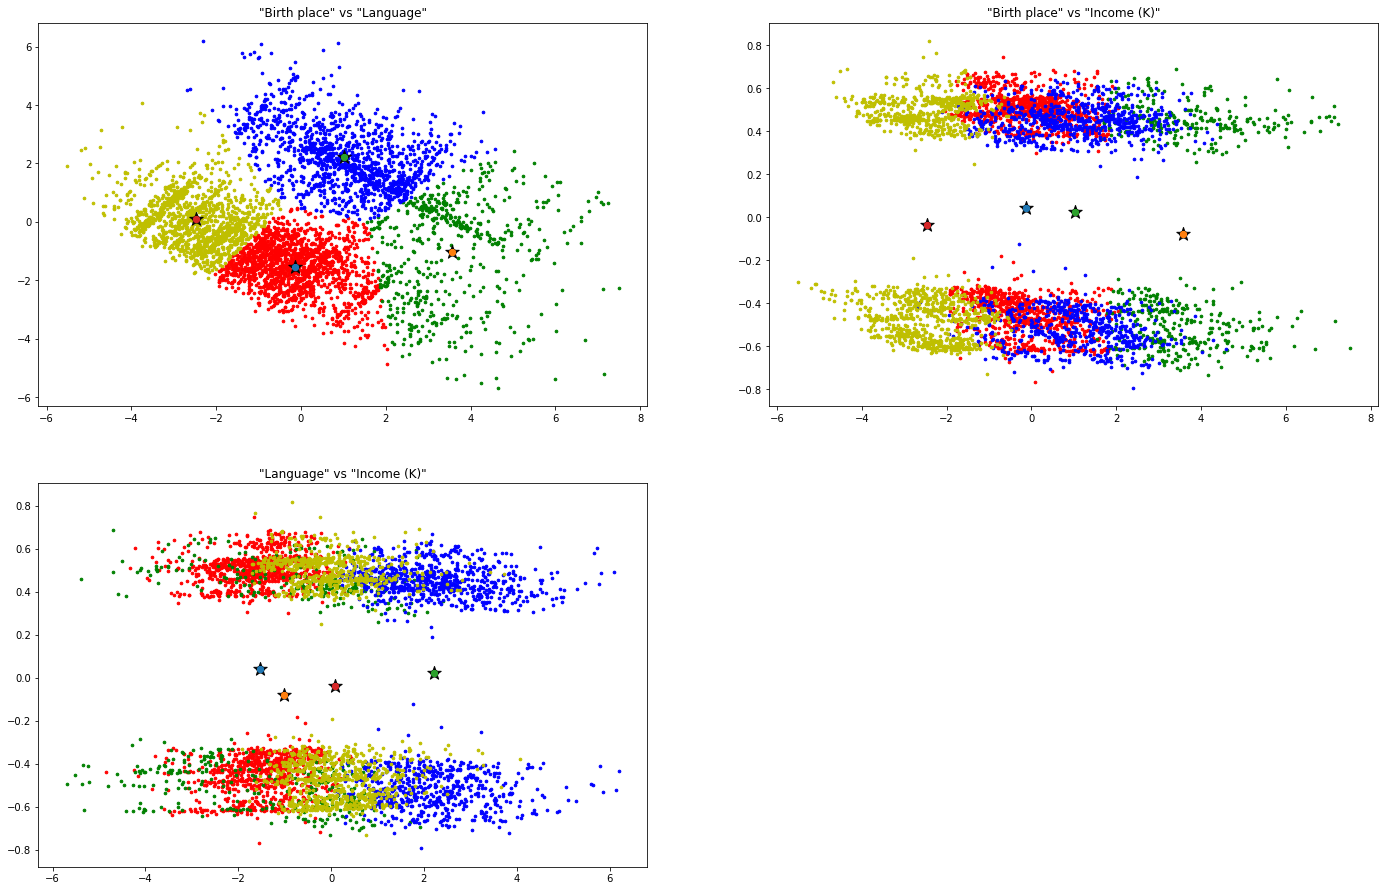

In [109]:
utils.kmeans_matrix_compare(df, n_clusters, centroids_reg, labels_reg, centroids_dp, labels_dp, chunk_size=2);

#### running on all features

1 error=705.4571220329331
2 error=394.4937671853438
3 error=83.1370811530834
4 error=27.67847829184071
5 error=33.69344245966218
6 error=59.42114551879771
7 error=86.92342749637432
8 error=112.57651441760815
9 error=136.1208008601976
10 error=158.57727784966977
11 error=154.76998117300064
12 error=131.3991555223154
13 error=108.9846845434715
14 error=74.10801704838224
15 error=46.40736903403386
16 error=26.793102801621995
17 error=14.532641270798631
18 error=7.535998799607232
19 error=3.8273180813827636
20 error=1.9360976328540902
21 error=0.9745360617966671
22 error=0.48849584047632144
23 error=0.24466634063651221
24 error=0.12243798736411768
25 error=0.061272190164633256
26 error=0.030615707086211127
27 error=0.015309494544464512
28 error=0.007655157574548045
29 error=0.0038276813693518923
30 error=0.001913866331006806
31 error=0.0009569395771875922
32 error=0.0004784713915285444
33 error=0.00023923609649940112
34 error=0.00011961814843226963
35 error=5.9809099262964536e-05
36 error=

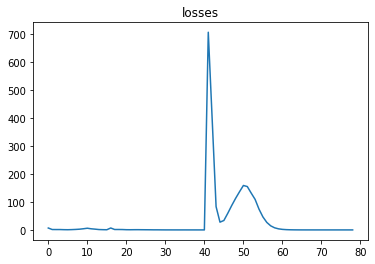

plotting kmeans clusters matrix...
plotting kmeans_matrix...
ERROR: scatter() missing 2 required positional arguments: 'xs' and 'ys'
  Too few features to plot: points.shape=(0,)
ERROR: scatter() missing 2 required positional arguments: 'xs' and 'ys'
  Too few features to plot: points.shape=(0,)
ERROR: scatter() missing 2 required positional arguments: 'xs' and 'ys'
  Too few features to plot: points.shape=(0,)
ERROR: scatter() missing 2 required positional arguments: 'xs' and 'ys'
  Too few features to plot: points.shape=(0,)
ERROR: scatter() missing 2 required positional arguments: 'xs' and 'ys'
  Too few features to plot: points.shape=(0,)
ERROR: scatter() missing 2 required positional arguments: 'xs' and 'ys'
  Too few features to plot: points.shape=(0,)
ERROR: scatter() missing 2 required positional arguments: 'xs' and 'ys'
  Too few features to plot: points.shape=(0,)
ERROR: scatter() missing 2 required positional arguments: 'xs' and 'ys'
  Too few features to plot: points.shape=

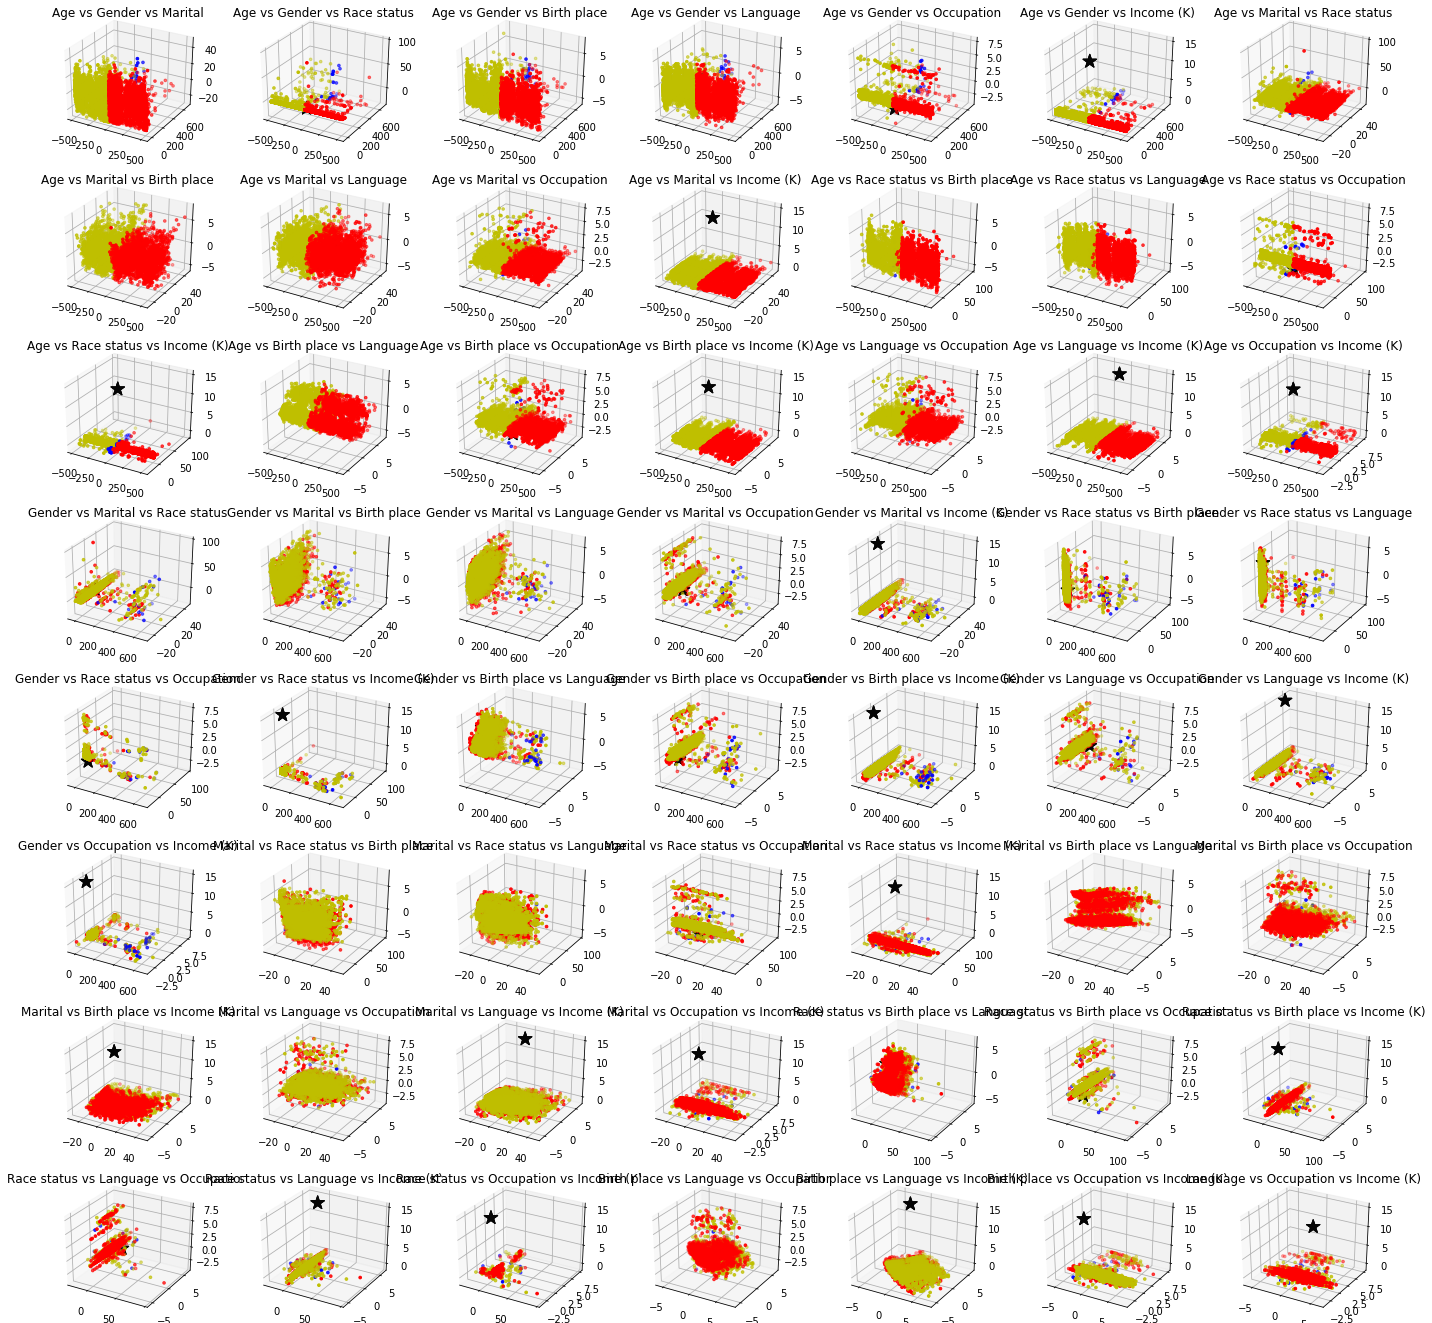

centroids: (4, 8)


In [60]:
centroids_dp, labels_dp = dp_kmeans.kmeans(data, eps=0.1, n_clusters=n_clusters, MAX_LOOPS=1e10, seed=0)

print('centroids:', centroids_dp.shape)

plotting kmeans_matrix...


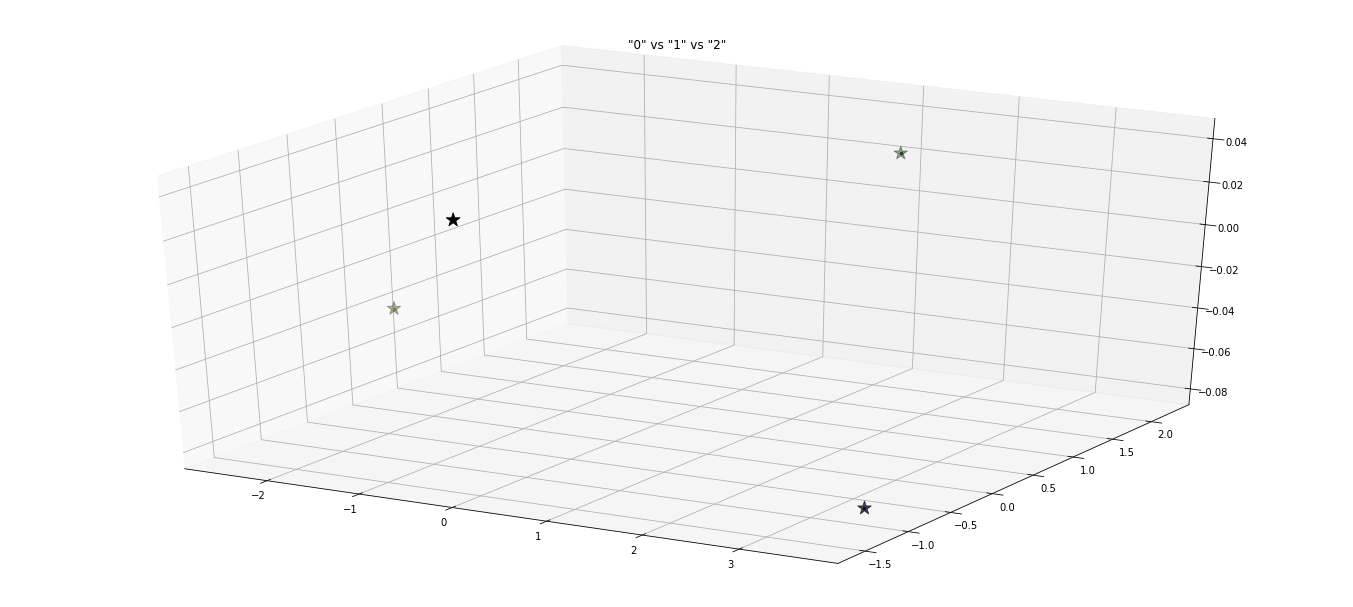

In [113]:
clf = KMeans(n_clusters=n_clusters, random_state=0).fit(data)
centroids_reg, labels_reg = clf.cluster_centers_, clf.labels_

utils.kmeans_matrix(data, n_clusters, centroids_reg, labels_reg, chunk_size=3);

### Comparison

We compare the results between the normal kmeans and the DP kmeans, the bellow plot shows which centroids moved where.
This technique guesses the corresponding centroids by pairing the closest ones.

plotting comparison kmeans_matrix...


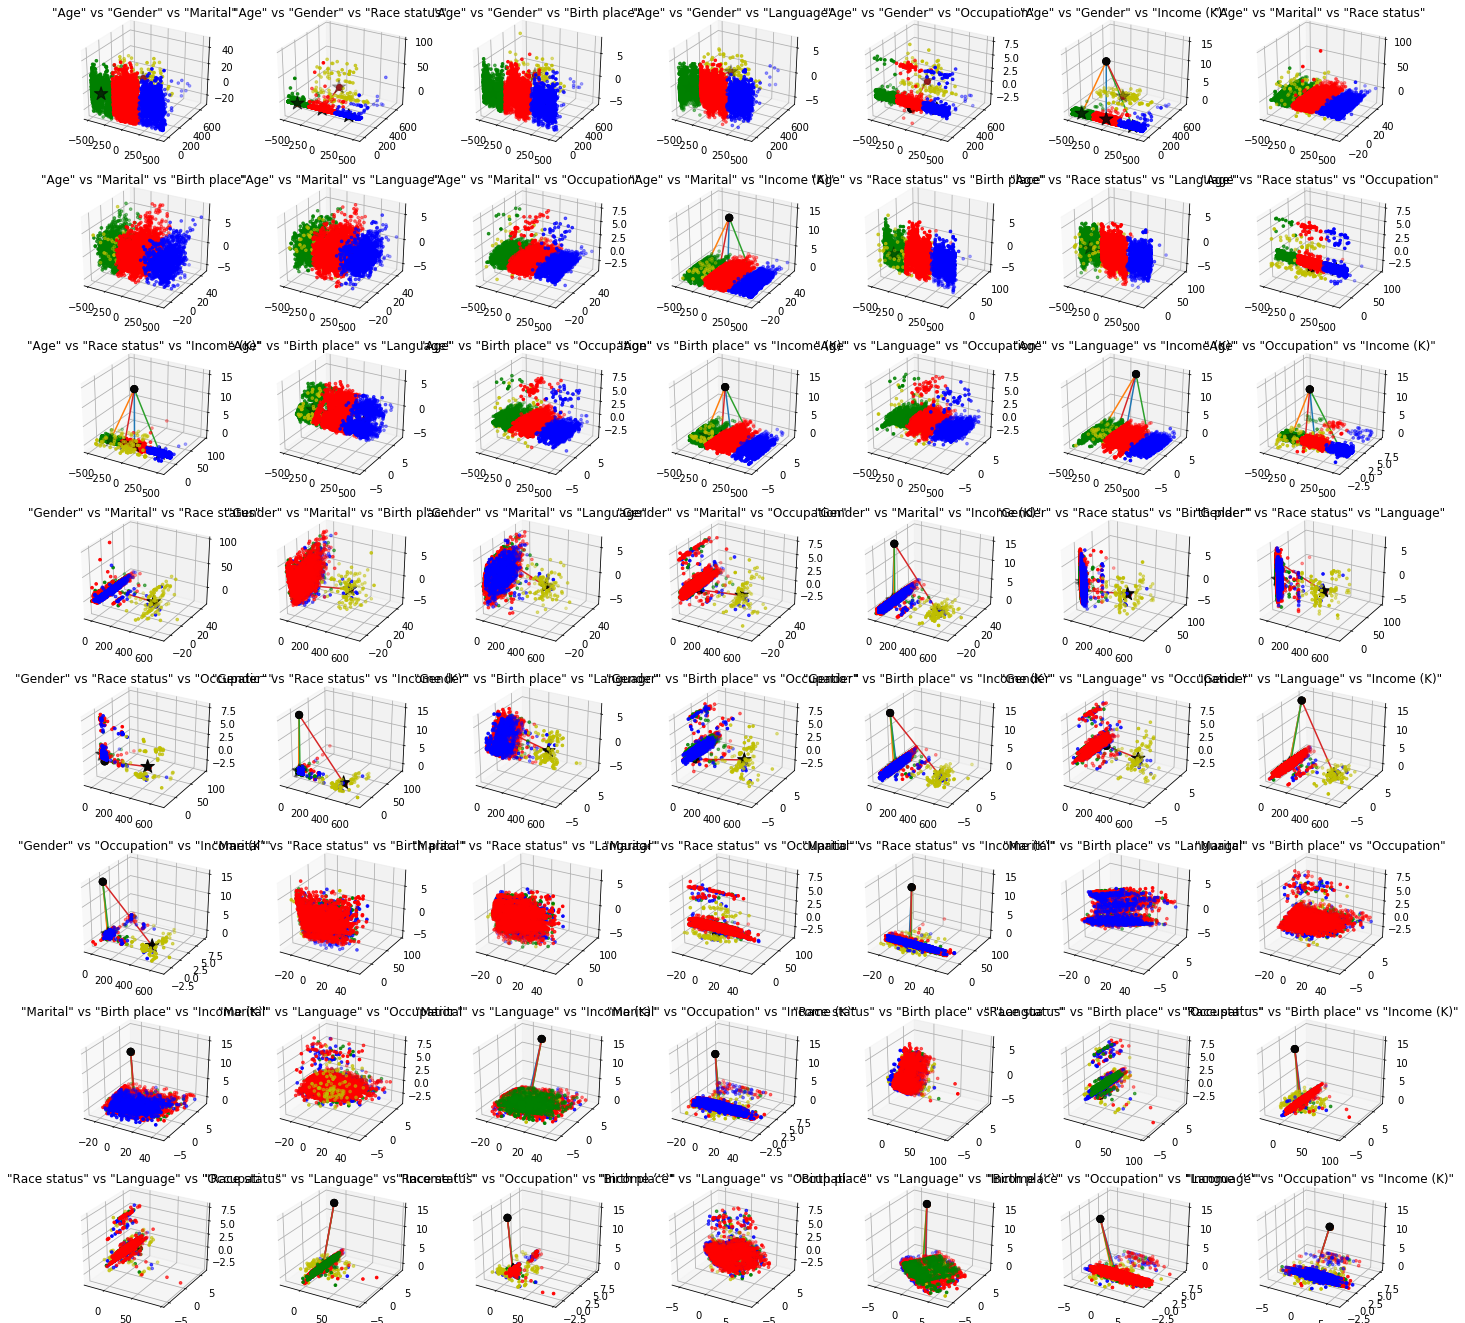

In [82]:
# showing the changes in centroids
utils.kmeans_matrix_compare(data.values, n_clusters, centroids_reg, labels_reg, centroids_dp, labels_dp, chunk_size=3, columns=data.columns);

In [ ]:
utils.kmeans_matrix_compare(data, n_clusters, centroids_reg, labels_reg, centroids_dp, labels_dp);

### Measuring performance

Clustering is an unsupervised problem, and we can't measure the performance if we don't have the ground truth values.


#### Davies Bouldin score

However some metrics can still be used even if the true labels are unkown, such as the [Davies Bouldin score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.davies_bouldin_score.html#sklearn.metrics.davies_bouldin_score).

(Lower is better)


In [22]:
from sklearn import metrics

In [23]:
print('regular kmeans davies_bouldin_score:', metrics.davies_bouldin_score(data.values, labels_reg))

print('dp kmeans davies_bouldin_score:', metrics.davies_bouldin_score(data.values, labels_dp))

regular kmeans davies_bouldin_score: 0.5353946183089037
dp kmeans davies_bouldin_score: 29.429473877632834


#### Generating Blobs

Another way to get by this problem, is to generate data with known labels, just for measuring performance.
Notice that we need to choose the same number of centers that we will be passing to the kmeans (in this case 5)

I made sure to choose a seed where the clusters aren't intersecting too much, `random_state=12` seemed fine.

(5000, 3) (5000,)


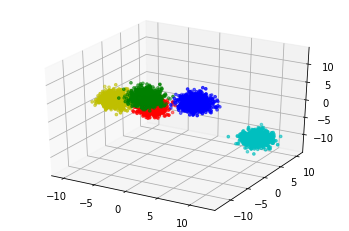

In [26]:
from sklearn.datasets import make_blobs
n_features = 3
n_clusters = 5

X_blobs, y_blobs = make_blobs(n_samples=5000, centers=n_clusters, n_features=n_features, random_state=12)
print(X_blobs.shape, y_blobs.shape)
labels_true = y_blobs


## plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

colors = ['r', 'g', 'b', 'y', 'c', 'm']
for k_ in range(n_clusters):
    points = np.array([X_blobs[j] for j in range(len(X_blobs)) if y_blobs[j]==k_])
    ax.scatter(*points.T, s=7, c=colors[k_])


In [27]:
clf = KMeans(n_clusters=n_clusters, random_state=0).fit(X_blobs)
centroids_reg2, labels_reg2 = clf.cluster_centers_, clf.labels_
#executed in 40ms


In [ ]:
centroids_dp2, labels_dp2 = dp_kmeans.kmeans(X_blobs, eps=0.5, n_clusters=n_clusters, MAX_LOOPS=1e10, seed=42)

In [ ]:
print('adjusted rand scores')
print('regular kmeans:\t', metrics.adjusted_rand_score(labels_true, labels_reg2)*100,'%')
print('dp kmeans:\t', metrics.adjusted_rand_score(labels_true, labels_dp2)*100,'%')

In [ ]:
print('v_measure_score')
print('regular kmeans:\t', metrics.v_measure_score(labels_true, labels_reg2)*100,'%')
print('dp kmeans:\t', metrics.v_measure_score(labels_true, labels_dp2)*100,'%')